#### https://www.kaggle.com/code/freespirit08/time-series-for-beginners-with-arima/data

Download dataset from above link, you will predict time series.


# Time Series Assignment 

In [112]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns,warnings
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6
warnings.filterwarnings('ignore')


In [16]:
df=pd.read_csv(r"A:\datasets\AirPassengers.csv")

In [17]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [19]:
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
df=df.set_index(['Month'])

In [25]:
from datetime import datetime
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


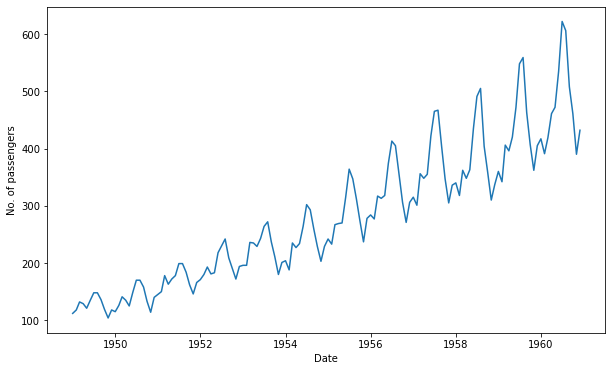

In [27]:
plt.xlabel('Date')
plt.ylabel('No. of passengers')
plt.plot(df)
plt.show()

### Rolling Statistics

In [32]:
#determining rolling statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
rolmean,rolstd

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01   463.333333
 1960-09-01   467.083333
 1960-10-01   471.583333
 1960-11-01   473.916667
 1960-12-01   476.166667
 
 [144 rows x 1 columns],
             #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01    83.630500
 1960-09-01    84.617276
 1960-10-01    82.541954
 1960-11-01    79.502382
 1960-12-01    77.737125
 
 [144 rows x 1 columns])

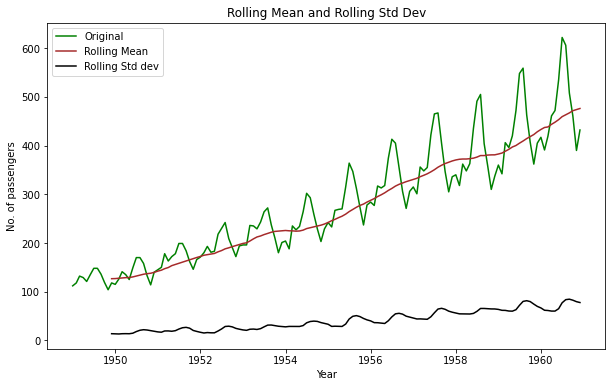

In [36]:
#plotting rolling statistics
orig = plt.plot(df, color='green', label='Original')
mean = plt.plot(rolmean, color='brown', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std dev')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('No. of passengers')
plt.title("Rolling Mean and Rolling Std Dev")
plt.show()

#### Inference: Data is not Stationary as the mean and std is in uptrend

### Dickey-Fuller Test

In [52]:
from statsmodels.tsa.stattools import adfuller

print('Results of DCF test')
dftest = adfuller(df['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'No. of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of DCF test
Test Statistic                0.815369
p-value                       0.991880
No. of Lags used             13.000000
No. of Observations used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


#### Inferernce: Null hypothesis always says for the pvalue to be less whereas above it is high(usually 0.5) and Critical value must be more than Test Statistic value so we cannot reject the null hyphothesis therefore data is not Stationary

### Using Log to make the data Stationary

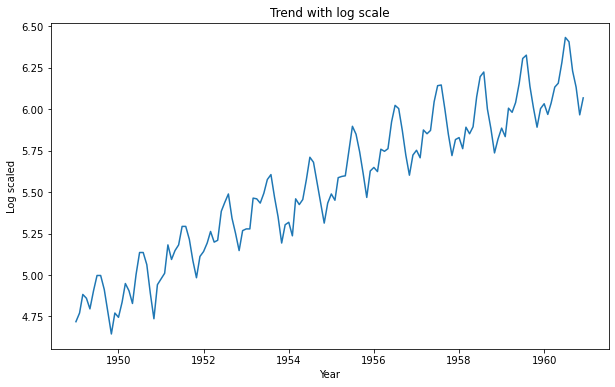

In [53]:
# Estimate the trend

df_logScale = np.log(df)
plt.plot(df_logScale)
plt.title('Trend with log scale')
plt.xlabel('Year')
plt.ylabel('Log scaled')
plt.show()

#### Inference: Trend remains same but the y-axis values are convered w.r.t to log

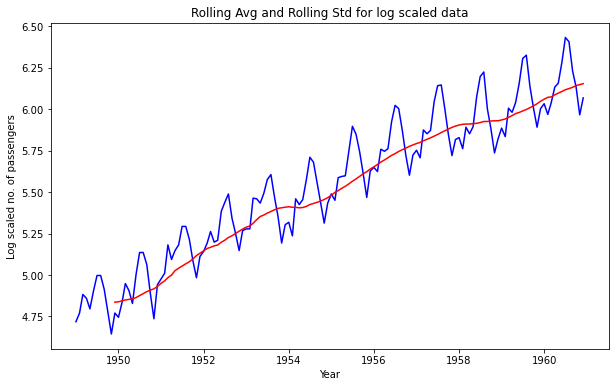

In [56]:
movingAvg = df_logScale.rolling(window=12).mean()
movingStd = df_logScale.rolling(window=12).std()
plt.plot(df_logScale, color ='blue', label='Log scaled data')
plt.plot(movingAvg, color='red', label= 'moving avg of log scaled data')
#plt.plot(movingStd, color='red', label= 'moving Std of log scaled data')
plt.title('Rolling Avg and Rolling Std for log scaled data')
plt.xlabel('Year')
plt.ylabel('Log scaled no. of passengers')
plt.show()

#### Inference: Data is not Stationary since the moving avg is in uptrend

In [60]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAvg

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [66]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAvg = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAvg, color='red', label='Rolling Avg')
    std = plt.plot(movingStd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Rolling Std')
    plt.show(block=False)
    
    #Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

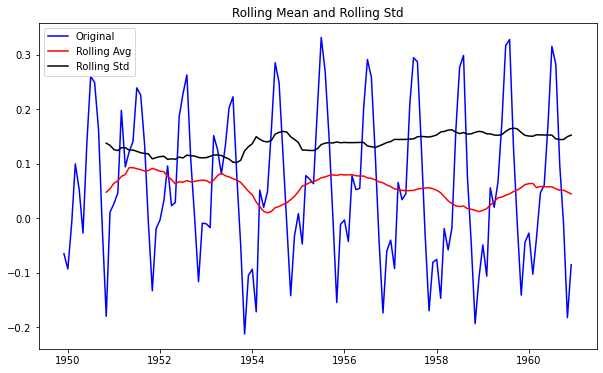

Results of Dickey-Fuller Test:
Test Statistic           -3.162908
p-value                   0.022235
#Lags Used               13.000000
#Observations used      119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [67]:
test_stationarity(datasetLogScaleMinusMovingAverage)

#### Inference: p-value is less, and Critical value and Test Statistic are having similar values which says that it is stationary

### Using Exponential Decay Weighted Average to make data Stationary

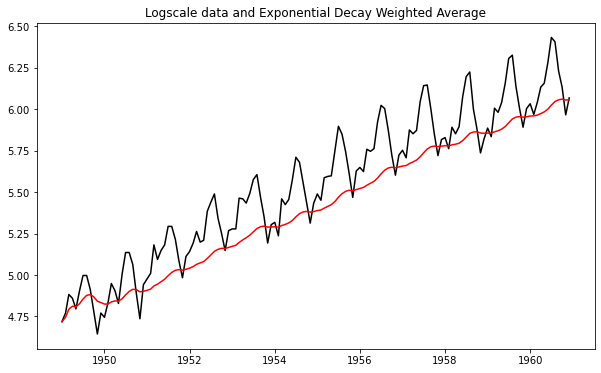

In [71]:
exponentialDecayWeightedAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale, color='black')
plt.plot(exponentialDecayWeightedAverage, color='red')
plt.title('Logscale data and Exponential Decay Weighted Average')
plt.show()

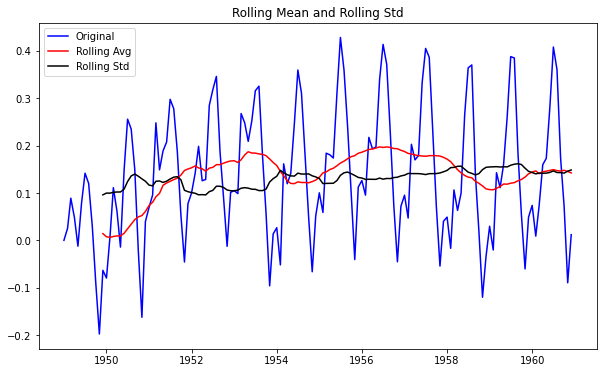

Results of Dickey-Fuller Test:
Test Statistic           -3.601262
p-value                   0.005737
#Lags Used               13.000000
#Observations used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [73]:
datasetLogScaleMinusMovingExponentialDecayAverage = df_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

#### Inference: p-value is lesser than log scaled, Test Statistic and Critical value is similar so it is Stationary

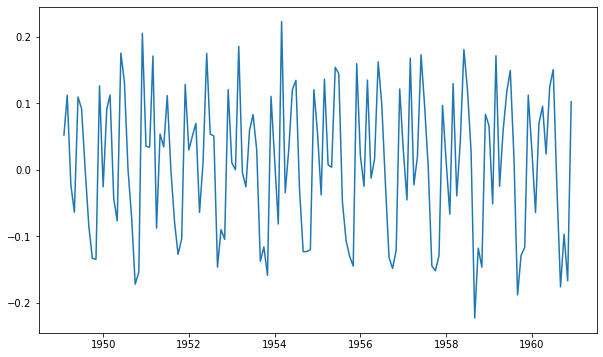

In [75]:
datasetLogDiffShifting = df_logScale - df_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.show()

#### Inference: We have taken lag of 1 here. (Intergration in Arima model will be 1 here)

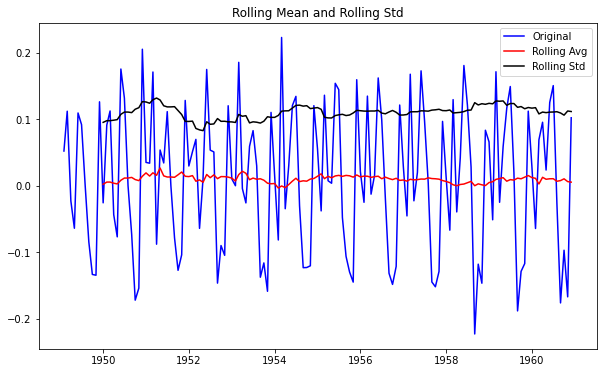

Results of Dickey-Fuller Test:
Test Statistic           -2.717131
p-value                   0.071121
#Lags Used               14.000000
#Observations used      128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [76]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

#### Inference: In the above plot the rolling avg and rolling std is almost straight so the null hypothesis is rejected.

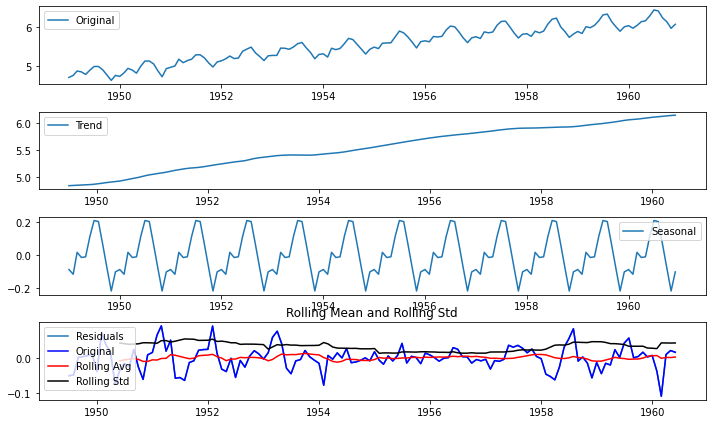

Results of Dickey-Fuller Test:
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
#Lags Used              9.000000e+00
#Observations used      1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
decomposedLogData=pd.DataFrame(decomposedLogData)
decomposedLogData.rename(columns={'resid':'#Passengers'},inplace=True)
test_stationarity(decomposedLogData)

#### Checking if noise is stationary or  not

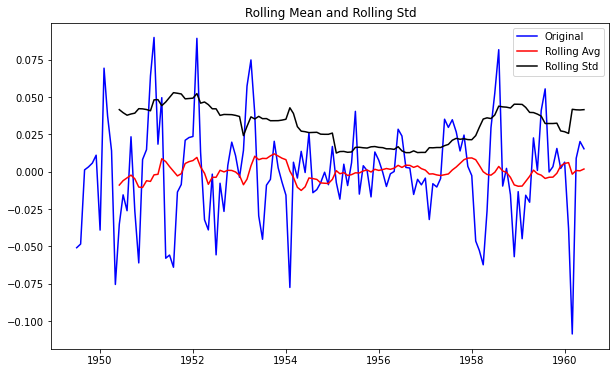

Results of Dickey-Fuller Test:
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
#Lags Used              9.000000e+00
#Observations used      1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [101]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
decomposedLogData=pd.DataFrame(decomposedLogData)
decomposedLogData.rename(columns={'resid':'#Passengers'},inplace=True)
test_stationarity(decomposedLogData)

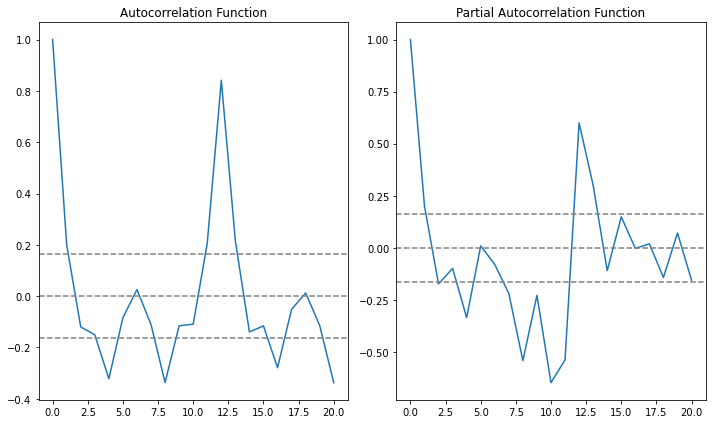

In [102]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### Inference: We can q and p values by checking where the line graph drop to zero for the first time i.e., 2(x-axis) in both the graphs

# Model building

Plotting AR model


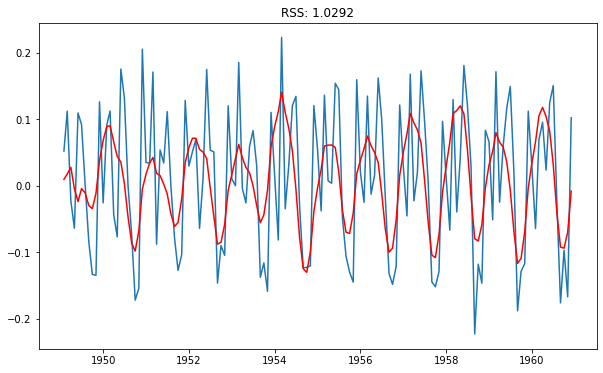

In [116]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(df_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')

Plotting MA model


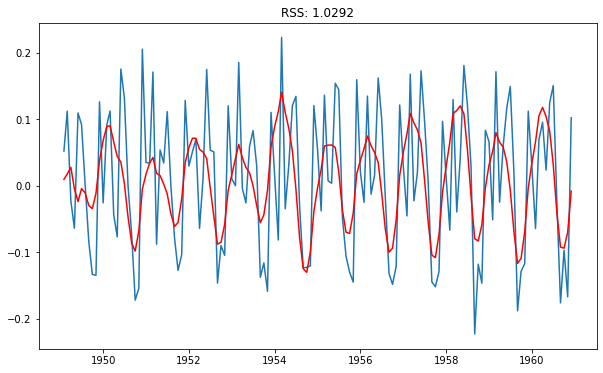

In [115]:
#MA model
model = ARIMA(df_logScale, order=(2,1,2))
results_MA = model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting MA model')

Text(0.5, 1.0, 'RSS: 1.0292')

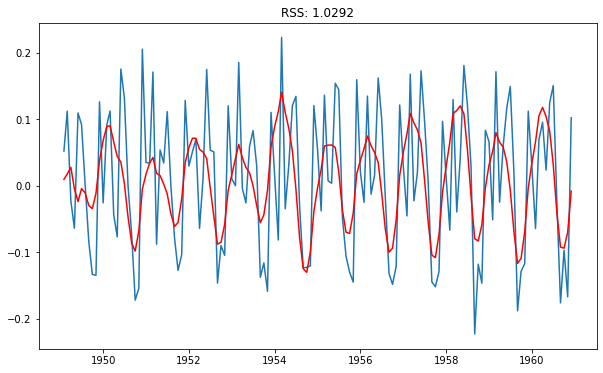

In [113]:
model = ARIMA(df_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))


In [114]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [117]:
#Convert to cummulative sum
prediction_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [132]:
predictions_ARIMA_log = pd.Series(df_logScale['#Passengers'].iloc[0],index=df_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

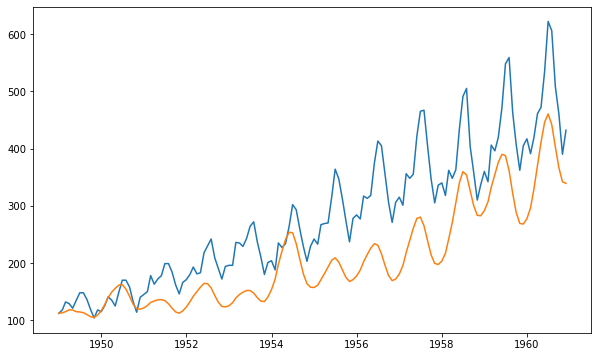

In [142]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.show()



#### Inference: Only the magnitude is varying and shape has been captured by model 

In [143]:
df_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


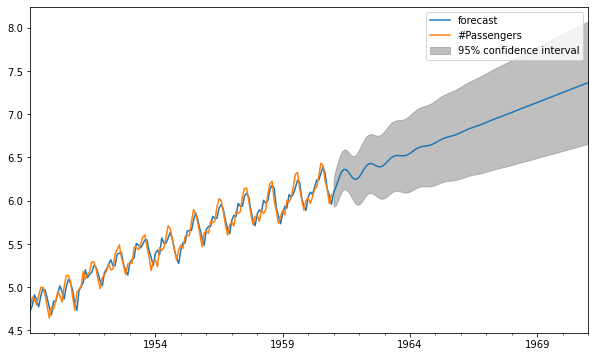

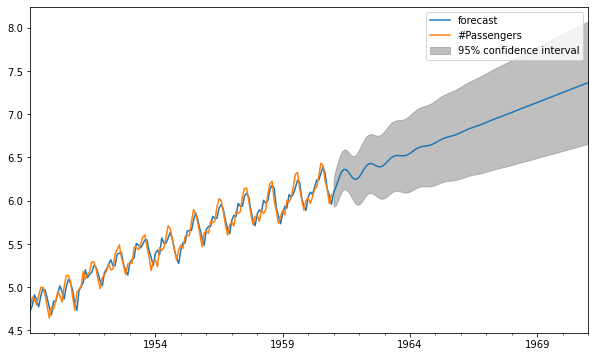

In [146]:
results_ARIMA.plot_predict(1,264) # checkin for next 10yrs(12x10=120)


#### Inference: The future predictions will be inside the 95% confidence interval only

In [147]:
results_ARIMA.forecast(steps=120)

(array([6.09553393, 6.15281401, 6.2244296 , 6.29241091, 6.34164702,
        6.36359347, 6.35784672, 6.33139295, 6.29597535, 6.26447713,
        6.24738326, 6.2502517 , 6.2727583 , 6.309403  , 6.35151476,
        6.38988635, 6.41727359, 6.43011034, 6.42906673, 6.41842477,
        6.40456147, 6.39403609, 6.39183076, 6.40019494, 6.41833678,
        6.44295389, 6.46937413, 6.49293962, 6.51024095, 6.51989011,
        6.52267559, 6.52112371, 6.51864513, 6.51853676, 6.52311908,
        6.53322344, 6.5481285 , 6.56591534, 6.58410283, 6.60036513,
        6.6131324 , 6.62192755, 6.62737765, 6.63093107, 6.63438668,
        6.63937964, 6.64696483, 6.65739818, 6.670153  , 6.68414224,
        6.69806597, 6.71077871, 6.72157702, 6.73033955, 6.73749783,
        6.74386351, 6.75037296, 6.75782566, 6.76668655, 6.77699794,
        6.78841289, 6.80032822, 6.81207161, 6.82308726, 6.83307102,
        6.84202459, 6.85022279, 6.85811189, 6.86617308, 6.87479119,
        6.88416269, 6.8942635 , 6.90487854, 6.91